In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("/content/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [22]:
Y_train

array([2, 7, 5, ..., 4, 0, 7])

In [23]:
X_train.shape

(784, 41000)

In [24]:
# def init_params():
#   W1 = np.random.randn(10, 784) - 0.5
#   b1 = np.random.randn(10, 1) - 0.5
#   W2 = np.random.randn(10, 10) - 0.5
#   b2 = np.random.randn(10, 1) - 0.5

# def relu(Z):
#   return np.maximum(0, Z)

# def softmax(Z):
#   return np.exp(Z)/ np.sum(np.exp(Z))

# def forward_prop(W1, b1, W2, b2, X):
#   Z1 = W1.dot(X) + b1
#   A1 = relu(Z1)
#   Z2 = W2.dot(X) + b2
#   A2 = softmax(A1)
#   return Z1, A1, Z2, A2


# def one_hot(Y):
#   one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#   one_hot_Y[np.arrange(Y.size), Y] = 1
#   one_hot_Y = one_hot_Y.T
#   return one_hot_Y

# def deriv_Relu(Z):
#   return Z > 0

# def backprop(Z1, A1, Z2, A2, W2, Y):
#   m = Y.size
#   one_hot_Y = one_hot(Y)
#   dZ2 = A2 - one_hot_Y
#   dW2 = 1 / m * dZ2.dot(A1.T)
#   db2 = 1 / m * np.sum(dZ2)
#   dZ1 = W2.T.dot(dZ2) * deriv_Relu(Z1)
#   dW1 = 1 / m * dZ1.dot(X.T)
#   db1 = 1 / m * np.sum(dZ1)
#   return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = b1 - alpha * db1
#     W2 = W2 - alpha * dW2
#     b2 = b2 - alpha * db2
#     return W1, b1, W2, b2


In [25]:
class Layer_Dense():
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.bias = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.inputs = inputs # Store inputs for backward pass
    self.output = np.dot(inputs, self.weights) + self.bias

  def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

In [26]:
class Activation_Relu():
   def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

   def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [27]:
class Loss():
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
          correct_confidences = y_pred_clipped[range(samples) , y_true]

        elif len(y_true.shape) == 2:
          correct_confidences = np.sum(y_pred_clipped * y_true, axis =1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


In [28]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        return self.loss.forward(self.activation.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples


In [29]:
# class Optimizer_SGD:
#     def __init__(self, learning_rate=0.01):
#         self.learning_rate = learning_rate

#     def update_params(self, layer):
#         layer.weights -= self.learning_rate * layer.dweights
#         layer.bias-= self.learning_rate * layer.dbiases


class Optimizer_SGD:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = {}

    def update_params(self, layer):
        if layer not in self.velocity:
            self.velocity[layer] = {
                "w": np.zeros_like(layer.weights),
                "b": np.zeros_like(layer.bias)
            }

        v = self.velocity[layer]

        # momentum update
        v["w"] = self.momentum * v["w"] - self.learning_rate * layer.dweights
        v["b"] = self.momentum * v["b"] - self.learning_rate * layer.dbiases

        layer.weights += v["w"]
        layer.bias += v["b"]


**Reasoning**:
The subtask requires initializing the neural network layers and the optimizer. I will create instances of `Layer_Dense`, `Activation_Relu`, `Activation_Softmax_Loss_CategoricalCrossentropy`, and `Optimizer_SGD` as instructed.



**Reasoning**:
With the `Layer_Dense` class definition corrected, I will now re-initialize the neural network layers and optimizer to ensure they are set up correctly without the previous `TypeError`.



In [58]:
dense1 = Layer_Dense(X_train.shape[0], 256)
activation1 = Activation_Relu()

dense2 = Layer_Dense(256, 128)
activation2 = Activation_Relu()

dense3 = Layer_Dense(128, 10)
activation3 = Activation_Softmax()

dense4 = Layer_Dense(64,10)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(learning_rate=0.01)

print("Neural network layers and optimizer initialized.")

Neural network layers and optimizer initialized.


## ImplementTrainingLoop

### Subtask:
Create a training loop that includes forward propagation, loss calculation, backward propagation, and parameter updates using the defined classes.


**Reasoning**:
Before implementing the training loop, the input data `X_train` and `X_dev` need to be transposed so that samples are rows and features are columns, as expected by the `Layer_Dense` class. Additionally, pixel values should be normalized to a [0, 1] range for better neural network performance.



In [47]:
X_train_processed = X_train.T / 255.0
X_dev_processed = X_dev.T / 255.0

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_dev_processed shape: {X_dev_processed.shape}")

X_train_processed shape: (41000, 784)
X_dev_processed shape: (1000, 784)


In [48]:
print(X_train_processed.min(), X_train_processed.max())


0.0 1.0


In [49]:
X_train.shape[0]

784

**Reasoning**:
Now that the data is preprocessed, I will implement the training loop. This involves defining hyperparameters like epochs and batch size, iterating through the data in mini-batches, performing forward and backward passes through the network layers, calculating loss, and updating the network's weights and biases using the optimizer.



In [ ]:
class Model:
    def __init__(self):
        self.dense1 = Layer_Dense(X_train.shape[0], 256)
        self.activation1 = Activation_Relu()

        self.dense2 = Layer_Dense(256, 128)
        self.activation2 = Activation_Relu()


        self.dense3 = Layer_Dense(128, 64)
        self.activation3 = Activation_Relu() # FIX: Changed from Activation_Softmax() to Activation_Relu()

        self.dense4 = Layer_Dense(64, 10) # This is the final layer producing logits for 10 classes

        self.loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
        self.optimizer = Optimizer_SGD(learning_rate=0.1)

        self.loss_history = [] # Initialize loss history
        self.acc_history = []  # Initialize accuracy history

    def accuracy(self, X, y):
      predictions = self.predict(X)
      return np.mean(predictions == y)

    def predict(self, X): # Added predict method for inference
        # Perform forward pass through the network
        self.dense1.forward(X)
        self.activation1.forward(self.dense1.output)
        self.dense2.forward(self.activation1.output)
        self.activation2.forward(self.dense2.output) # Forward pass for activation2
        self.dense3.forward(self.activation2.output) # Forward pass for dense3
        self.activation3.forward(self.dense3.output) # FIX: Now ReLU output from dense3
        self.dense4.forward(self.activation3.output) # FIX: dense4 now gets input from ReLU3, outputs logits
        # Apply softmax activation to get probabilities
        self.loss_activation.activation.forward(self.dense4.output) # FIX: Changed to dense4.output
        # Return predicted class labels
        return np.argmax(self.loss_activation.activation.output, axis=1)

    def fit(self, X, y, epochs=2, batch_size=64):
        n_samples = X.shape[0]

        for epoch in range(epochs):
            # shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            correct = 0

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # -------- forward --------
                self.dense1.forward(X_batch)
                self.activation1.forward(self.dense1.output)

                self.dense2.forward(self.activation1.output)
                self.activation2.forward(self.dense2.output) # Forward pass for activation2

                self.dense3.forward(self.activation2.output) # Forward pass for dense3
                self.activation3.forward(self.dense3.output) # FIX: Now ReLU output from dense3
                self.dense4.forward(self.activation3.output) # FIX: dense4 now gets input from ReLU3, outputs logits
                # loss
                sample_losses = self.loss_activation.forward(
                    self.dense4.output, y_batch # FIX: Changed to dense4.output
                )
                epoch_loss += np.sum(sample_losses)

                # accuracy
                predictions = np.argmax(
                    self.loss_activation.activation.output, axis=1
                )
                correct += np.sum(predictions == y_batch)

                # -------- backward --------
                self.loss_activation.backward(
                    self.loss_activation.activation.output, y_batch
                )
                self.dense4.backward(self.loss_activation.dinputs)
                self.activation3.backward(self.dense4.dinputs) # FIX: activation3 is now ReLU
                self.dense3.backward(self.activation3.dinputs) # FIX: Corrected typo from self.loss_activation3.dinputs to self.activation3.dinputs
                self.activation2.backward(self.dense3.dinputs) # Backward pass for activation2
                self.dense2.backward(self.activation2.dinputs) # Changed to activation2.dinputs
                self.activation1.backward(self.dense2.dinputs)
                self.dense1.backward(self.activation1.dinputs)

                # -------- update --------
                self.optimizer.update_params(self.dense1)
                self.optimizer.update_params(self.dense2)
                self.optimizer.update_params(self.dense3) # Update params for dense3
                self.optimizer.update_params(self.dense4)

            avg_epoch_loss = epoch_loss / n_samples
            epoch_accuracy = correct / n_samples
            self.loss_history.append(avg_epoch_loss) # Store epoch loss
            self.acc_history.append(epoch_accuracy)   # Store epoch accuracy

            print(
                f"Epoch {epoch+1}/{epochs} | "
                f"Loss: {avg_epoch_loss:.4f} | "
                f"Accuracy: {epoch_accuracy:.4f}"
            )


# ===================== TRAIN =====================

model = Model()
model.fit(X_train_processed, Y_train, epochs=100, batch_size=64)

Epoch 1/100 | Loss: 0.3375 | Accuracy: 0.8976
Epoch 2/100 | Loss: 0.1491 | Accuracy: 0.9552
Epoch 3/100 | Loss: 0.1070 | Accuracy: 0.9685
Epoch 4/100 | Loss: 0.0835 | Accuracy: 0.9756
Epoch 5/100 | Loss: 0.0744 | Accuracy: 0.9779
Epoch 6/100 | Loss: 0.0690 | Accuracy: 0.9789
Epoch 7/100 | Loss: 0.0540 | Accuracy: 0.9838
Epoch 8/100 | Loss: 0.0497 | Accuracy: 0.9862
Epoch 9/100 | Loss: 0.0474 | Accuracy: 0.9855
Epoch 10/100 | Loss: 0.0375 | Accuracy: 0.9893
Epoch 11/100 | Loss: 0.0397 | Accuracy: 0.9881
Epoch 12/100 | Loss: 0.0340 | Accuracy: 0.9905
Epoch 13/100 | Loss: 0.0340 | Accuracy: 0.9904
Epoch 14/100 | Loss: 0.0286 | Accuracy: 0.9924
Epoch 15/100 | Loss: 0.0331 | Accuracy: 0.9905
Epoch 16/100 | Loss: 0.0213 | Accuracy: 0.9937
Epoch 17/100 | Loss: 0.0207 | Accuracy: 0.9943
Epoch 18/100 | Loss: 0.0256 | Accuracy: 0.9925
Epoch 19/100 | Loss: 0.0317 | Accuracy: 0.9915


In [ ]:
train_data = np.loadtxt('train.csv', delimiter=',', skiprows=1)
# test_data = np.loadtxt('/kaggle/input/digit-recognizer/test.csv', delimiter=',', skiprows=1)

p = np.random.permutation(train_data.shape[0])
train_data = train_data[p]

labels = train_data[:, 0]
train_data = train_data[:, 1:]

train_data = np.reshape(train_data, (train_data.shape[0], 1, 28, 28))
# test_data = np.reshape(test_data, (test_data.shape[0], 1, 28, 28))
print(f'Training data shape: {train_data.shape}')

fig, axes = plt.subplots(1,10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data[i][0])
    ax.set_title(labels[i].astype(int))
    ax.axis('off')
fig.show()

In [41]:
def make_predictions_oop(X, model):
    predictions = model.predict(X) # Changed to call model.predict()
    return predictions
def test_prediction_oop(index, model, X_train, Y_train):
    # single image (same slicing logic)
    current_image = X_train[:, index].reshape(1, -1)

    prediction = make_predictions_oop(current_image, model)
    label = Y_train[index]
    print("Prediction:", prediction[0])
    print("Label:", label)

    # reshape & display image
    image = current_image.reshape(28, 28) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

In [ ]:
test_prediction_oop(8, model, X_train, Y_train)
test_prediction_oop(1, model, X_train, Y_train)
test_prediction_oop(2, model, X_train, Y_train)
test_prediction_oop(3, model, X_train, Y_train)
test_prediction_oop(4, model, X_train, Y_train)
test_prediction_oop(5, model, X_train, Y_train)
test_prediction_oop(6, model, X_train, Y_train)
test_prediction_oop(7, model, X_train, Y_train)
test_prediction_oop(8, model, X_train, Y_train)
test_prediction_oop(9, model, X_train, Y_train)

In [60]:
# Evaluate the model on the development set
dev_predictions = model.predict(X_dev_processed)
dev_accuracy = np.mean(dev_predictions == Y_dev)

print(f"Development Set Accuracy: {dev_accuracy:.4f}")

Development Set Accuracy: 0.9750


In [62]:
train_predictions = model.predict(X_train_processed)
train_accuracy = np.mean(train_predictions == Y_train)

print(f"Development Set Accuracy: {train_accuracy:.4f}")

Development Set Accuracy: 1.0000


In [ ]:
test_prediction_oop(0, model, X_dev, Y_dev)
test_prediction_oop(1, model, X_dev, Y_dev)
test_prediction_oop(2, model, X_dev, Y_dev)
test_prediction_oop(3, model, X_dev, Y_dev)
test_prediction_oop(4, model, X_dev, Y_dev)
test_prediction_oop(5, model, X_dev, Y_dev)
test_prediction_oop(6, model, X_dev, Y_dev)
test_prediction_oop(7, model, X_dev, Y_dev)
test_prediction_oop(8, model, X_dev, Y_dev)
test_prediction_oop(9, model, X_dev, Y_dev)

In [ ]:
test_prediction_oop(2, model, X_dev, Y_dev)

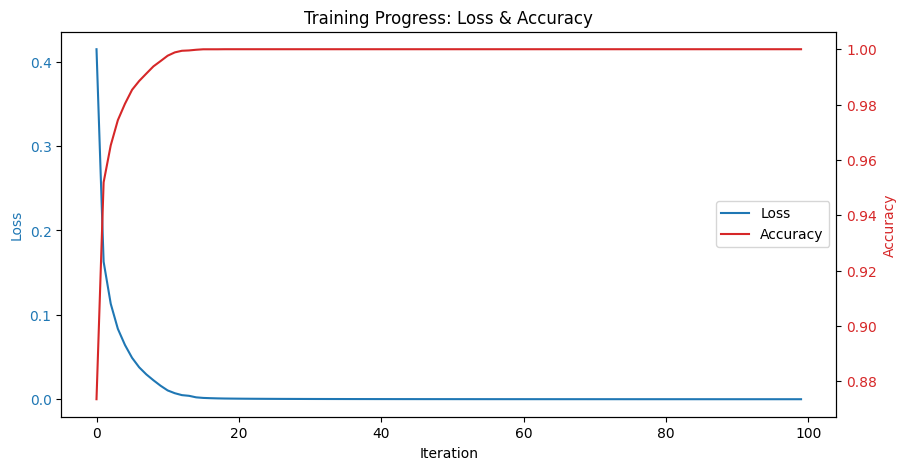

In [61]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# ---- Loss curve (left Y-axis) ----
ax1.plot(model.loss_history, color='tab:blue', label='Loss')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Loss", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ---- Accuracy curve (right Y-axis) ----
ax2 = ax1.twinx()
ax2.plot(model.acc_history, color='tab:red', label='Accuracy')
ax2.set_ylabel("Accuracy", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# ---- Title ----
plt.title("Training Progress: Loss & Accuracy")

# ---- Legend (combined) ----
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="center right")

plt.show()


In [ ]:
# load test data
test_data = np.loadtxt('test.csv', delimiter=',', skiprows=1)

# normalize (same as train!)
X_test = test_data / 255.0

In [ ]:
# Use the model's predict method for a complete forward pass and prediction
test_predictions = model.predict(X_test)


In [ ]:
test_predictions.shape

In [ ]:
import pandas as pd

submission = pd.DataFrame({
    'ImageId': np.arange(1, len(test_predictions) + 1),
    'Label': test_predictions
})

submission.to_csv('submission.csv', index=False)
